$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
$$

#2D linear convection
Here we solve the two dimensional linear convention equation for a scalar field $u(x,y)$

$$\pad{u}{t}+c\pad{u}{x}+c\pad{u}{y}=0$$.

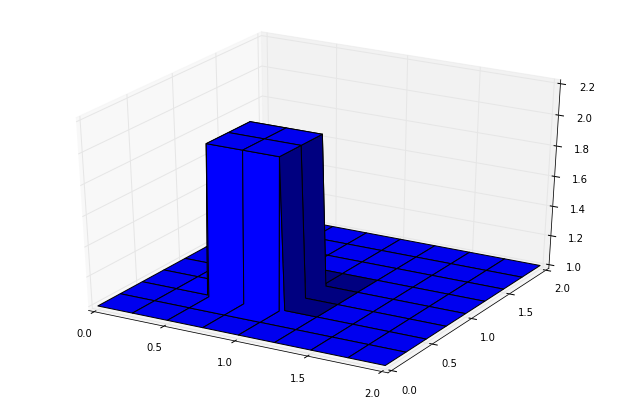

In [26]:
from mpl_toolkits.mplot3d import Axes3D    ##New Library required for projected 3d plots

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###variable declarations
nx = 81
ny = 81
nt = 100
c = 1
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
dt = 0.005

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx)) ##create a 1xn vector of 1's
un = np.ones((ny,nx)) ##

###Assign initial conditions

u[.5/dy:1/dy+1,.5/dx:1/dx+1]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2

###Plot Initial Condition
fig = plt.figure(figsize=(11,7), dpi=100) ##the figsize parameter can be used to produce different sized images
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x,y)                            
surf = ax.plot_surface(X,Y,u[:])

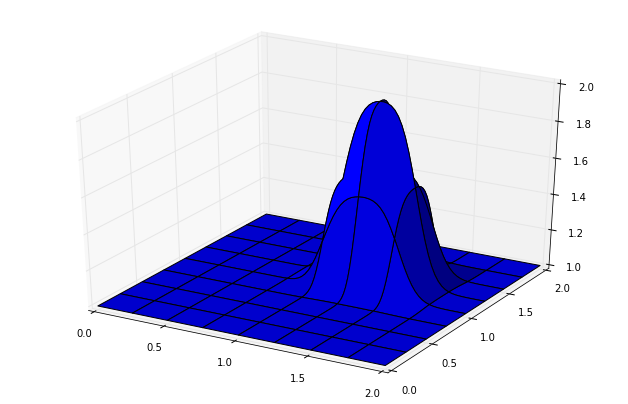

In [22]:
u = np.ones((ny,nx))
u[.5/dy:1/dy+1,.5/dx:1/dx+1]=2

for n in range(nt+1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    for j in range(1, row):
        for i in range(1, col):
            u[j,i] = un[j, i] - (c*dt/dx*(un[j,i] - un[j,i-1]))-(c*dt/dy*(un[j,i]-un[j-1,i]))


fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X,Y,u[:])

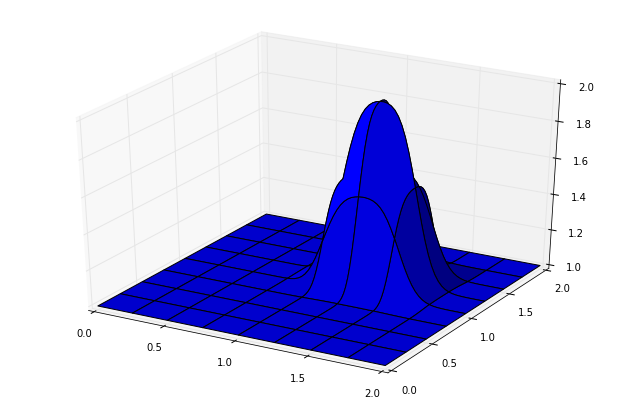

In [27]:
u = np.ones((ny,nx))
u[.5/dy:1/dy+1,.5/dx:1/dx+1]=2

for n in range(nt+1): ##loop across number of time steps
    un = u.copy()
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    u[1:-1,1:-1]=un[1:-1,1:-1]-(c*dt/dx*(un[1:-1,1:-1]-un[1:-1,0:-2]))-(c*dt/dy*(un[1:-1,1:-1]-un[0:-2,1:-1]))

#u[1:,1:]=un[1:,1:]-(c*dt/dx*(un[1:,1:]-un[1:,:-1]))-(c*dt/dy*(un[1:,1:]-un[:-1,1:]))

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X,Y,u[:])


The program above uses an arbitrary time-step `dt` while we learned in the course that we have fulfill the CFL condition:

$$\sigma=\frac{c\,\Delta t}{(\Delta x,\Delta y)_{min}}\leq 0.5$$

Please implement this condition into above code and run the two variants for much higher grid spacing. Also do some timing using the magic '%%timeit' but remember to comment out the plotting. What amount of speed up can you reach. Then carefully check the code if the boundary conditions are properly set.